In [ ]:
!nvidia-smi

Wed Apr 20 09:28:15 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Installs the YFinance Library in the Colab Environment
!pip install yfinance

     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 6.4 MB 28.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import yfinance as yf       # used to fetch the historic stock market data
import numpy as np          # used for fast numerical operations
import pandas as pd         # used for row-wise/column-wise operations, since tabular data
import tensorflow as tf     # used to create deep learning pipelines

In [ ]:
# Ticker or Stock Symbol
data = yf.download("GOOGL", start = "2016-01-01", end = "2022-03-19", interval = '1d')

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.shape

(1564, 6)

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,762.200012,762.200012,747.539978,759.440002,759.440002,3369100
2016-01-05,764.099976,769.200012,755.650024,761.530029,761.530029,2260800
2016-01-06,750.369995,765.729980,748.000000,759.330017,759.330017,2410300
2016-01-07,746.489990,755.309998,735.280029,741.000000,741.000000,3156600
2016-01-08,747.799988,750.119995,728.919983,730.909973,730.909973,2375300
...,...,...,...,...,...,...
2022-03-14,2605.000000,2608.179932,2505.500000,2519.020020,2519.020020,1940600
2022-03-15,2539.520020,2597.090088,2514.409912,2583.959961,2583.959961,1546000
2022-03-16,2614.659912,2666.659912,2574.689941,2665.610107,2665.610107,1778800


In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,762.200012,762.200012,747.539978,759.440002,759.440002,3369100
2016-01-05,764.099976,769.200012,755.650024,761.530029,761.530029,2260800
2016-01-06,750.369995,765.729980,748.000000,759.330017,759.330017,2410300
2016-01-07,746.489990,755.309998,735.280029,741.000000,741.000000,3156600
2016-01-08,747.799988,750.119995,728.919983,730.909973,730.909973,2375300


In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-14,2605.000000,2608.179932,2505.500000,2519.020020,2519.020020,1940600
2022-03-15,2539.520020,2597.090088,2514.409912,2583.959961,2583.959961,1546000
2022-03-16,2614.659912,2666.659912,2574.689941,2665.610107,2665.610107,1778800
2022-03-17,2662.979980,2681.610107,2643.699951,2676.780029,2676.780029,1413200
2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2228300


#### Understanding the Trends in the Data

In [ ]:
# Sorting the data points based on indices (just for confirmation)
data.sort_index(inplace = True)

In [ ]:
# Removal of duplicate indices
data = data.loc[~data.index.duplicated(keep = 'first')]

In [ ]:
# Checking for missing values in the data set
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1.564000e+03
mean,1376.683421,1389.896404,1363.011172,1376.910147,1376.910147,1.786954e+06
std,629.829448,636.012178,622.747364,629.419094,629.419094,8.558042e+05
min,682.489990,683.330017,672.659973,681.140015,681.140015,4.656000e+05
25%,952.452499,959.852509,946.014999,954.810013,954.810013,1.257475e+06
50%,1154.610046,1171.669983,1143.775024,1159.549988,1159.549988,1.553950e+06
75%,1516.937531,1537.117493,1505.474976,1518.637512,1518.637512,2.018700e+06
max,3025.000000,3030.929932,2977.979980,2996.770020,2996.770020,7.039900e+06


In [ ]:
import plotly.graph_objects as go

# Checking the trend in Opening Values
fig = go.Figure()

fig.add_trace(go.Scatter(x = data.index, y = data['Open'], mode = 'lines',))
fig.update_layout(height = 500, width = 900, xaxis_title = 'Date', yaxis_title = 'Open')
fig.show()

In [ ]:
# Checking the trend in High Values
fig = go.Figure()

fig.add_trace(go.Scatter(x = data.index, y = data['High'], mode = 'lines',))
fig.update_layout(height = 500, width = 900, xaxis_title = 'Date', yaxis_title = 'High')
fig.show()

In [ ]:
# Checking the trend in Low Values
fig = go.Figure()

fig.add_trace(go.Scatter(x = data.index, y = data['Low'], mode = 'lines',))
fig.update_layout(height = 500, width = 900, xaxis_title = 'Date', yaxis_title = 'Low')
fig.show()

In [ ]:
# Checking the trend in Closing Values
fig = go.Figure()

fig.add_trace(go.Scatter(x = data.index, y = data['Close'], mode = 'lines',))
fig.update_layout(height = 500, width = 900, xaxis_title = 'Date', yaxis_title = 'Close')
fig.show()

In [ ]:
# Checking the trend in Volume Values
fig = go.Figure()

fig.add_trace(go.Scatter(x = data.index, y = data['Volume'], mode = 'lines',))
fig.update_layout(height = 500, width = 900, xaxis_title = 'Date', yaxis_title = 'Volume')
fig.show()

In [ ]:
# Checking the trend in Adjusted Closing Values
fig = go.Figure()

fig.add_trace(go.Scatter(x = data.index, y = data['Adj Close'], mode = 'lines',))
fig.update_layout(height = 500, width = 900, xaxis_title = 'Date', yaxis_title = 'Adj Close')
fig.show()

In [ ]:
df1=data.reset_index()['Close']
df1

0        759.440002
1        761.530029
2        759.330017
3        741.000000
4        730.909973
           ...     
1559    2519.020020
1560    2583.959961
1561    2665.610107
1562    2676.780029
1563    2722.510010
Name: Close, Length: 1564, dtype: float64

In [ ]:
temp=np.array(df1)

In [ ]:
temp

array([ 759.44000244,  761.5300293 ,  759.33001709, ..., 2665.61010742,
       2676.7800293 , 2722.51000977])

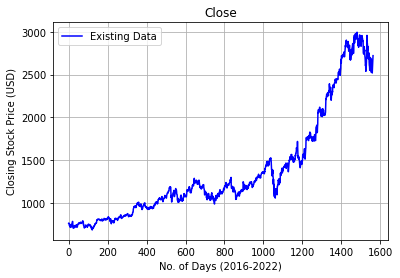

In [ ]:
import matplotlib.pyplot as plt
plt.grid()
plt.title("Close")
plt.xlabel('No. of Days (2016-2022)')
plt.ylabel('Closing Stock Price (USD)')
plt.plot(df1,c='blue',label='Existing Data')
plt.legend()

### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)

[[0.03381369]
 [0.03471626]
 [0.03376619]
 ...
 [0.85698928]
 [0.86181299]
 [0.88156139]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(1016, 548)

In [ ]:
train_data

array([[0.03381369],
       [0.03471626],
       [0.03376619],
       ...,
       [0.32772507],
       [0.3236484 ],
       [0.32736661]])

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(915, 100)
(915,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(447, 100)
(447,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
15/15 [==============================] - 17s 309ms/step - loss: 0.0051 - val_loss: 0.0795
Epoch 2/100
15/15 [==============================] - 1s 84ms/step - loss: 8.9592e-04 - val_loss: 0.0202
Epoch 3/100
15/15 [==============================] - 1s 86ms/step - loss: 3.3154e-04 - val_loss: 0.0015
Epoch 4/100
15/15 [==============================] - 1s 90ms/step - loss: 2.6980e-04 - val_loss: 0.0014
Epoch 5/100
15/15 [==============================] - 1s 86ms/step - loss: 2.5318e-04 - val_loss: 0.0022
Epoch 6/100
15/15 [==============================] - 1s 99ms/step - loss: 2.6513e-04 - val_loss: 0.0030
Epoch 7/100
15/15 [==============================] - 1s 93ms/step - loss: 2.4257e-04 - val_loss: 0.0016
Epoch 8/100
15/15 [==============================] - 1s 90ms/step - loss: 2.2500e-04 - val_loss: 0.0019
Epoch 9/100
15/15 [==============================] - 1s 91ms/step - loss: 2.2578e-04 - val_loss: 0.0014
Epoch 10/100
15/15 [==============================] - 1s 83ms/step

In [ ]:
tf.__version__

'2.8.0'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1045.0778927675947

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

2256.893397619767

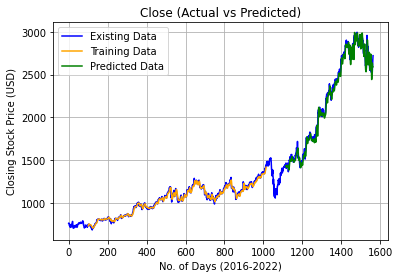

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1),c='blue',label='Existing Data')
plt.plot(trainPredictPlot,c='orange',label='Training Data')
plt.plot(testPredictPlot,c='green',label='Predicted Data')
plt.legend()
plt.grid()
plt.title('Close (Actual vs Predicted)')
plt.xlabel('No. of Days (2016-2022)')
plt.ylabel('Closing Stock Price (USD)')
plt.show()

In [ ]:
len(test_data)


548

In [ ]:
x_input=test_data[448:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input


[0.9090527859752329,
 0.9687256074060655,
 0.9655428376319828,
 0.9845182099123544,
 0.945228694628433,
 0.9619455107242147,
 0.9720119110319485,
 0.9864313721066205,
 0.9914796489822872,
 0.993025698272308,
 0.9920540404533751,
 0.9659272413220683,
 0.9648303307374138,
 0.9899768266568674,
 0.9880248656260813,
 0.9830499691586152,
 0.9845268553052744,
 1.0000000000000002,
 0.9921230981651157,
 0.969455405086475,
 0.9649641234644346,
 0.9678834196176935,
 0.9338797186515022,
 0.9627920212090468,
 0.9314138839000696,
 0.924107050839813,
 0.9406425245475127,
 0.9323121613108019,
 0.9422749223351143,
 0.9778115990703251,
 0.9857317278698106,
 0.9809986915408679,
 0.9841339116538896,
 0.9653485271545204,
 0.9487698264822197,
 0.9706559549545508,
 0.9534165143135815,
 0.9299240296640301,
 0.9289048221840361,
 0.9450170933651303,
 0.9704313856018678,
 0.9747628328865054,
 0.9833133373478182,
 0.9727806129804988,
 0.9725042767019156,
 0.9685787411580431,
 0.9569318154202286,
 0.95813668798476

In [ ]:
# demonstrate prediction for next 20 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<20):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.8605592]
101
1 day input [0.96872561 0.96554284 0.98451821 0.94522869 0.96194551 0.97201191
 0.98643137 0.99147965 0.9930257  0.99205404 0.96592724 0.96483033
 0.98997683 0.98802487 0.98304997 0.98452686 1.         0.9921231
 0.96945541 0.96496412 0.96788342 0.93387972 0.96279202 0.93141388
 0.92410705 0.94064252 0.93231216 0.94227492 0.9778116  0.98573173
 0.98099869 0.98413391 0.96534853 0.94876983 0.97065595 0.95341651
 0.92992403 0.92890482 0.94501709 0.97043139 0.97476283 0.98331334
 0.97278061 0.97250428 0.96857874 0.95693182 0.95813669 0.95302357
 0.89580804 0.89557051 0.88926127 0.90353376 0.91274511 0.92738049
 0.90282125 0.91053842 0.88046015 0.87284672 0.85722239 0.8316916
 0.83559984 0.80218339 0.82203111 0.82006196 0.85759815 0.87446183
 0.89467655 0.98412094 0.9417135  0.94346683 0.90812436 0.90983446
 0.92877535 0.90310623 0.86564342 0.87638353 0.885733   0.89548848
 0.85058494 0.83213641 0.82704491 0.80782335 0.85189778 0.86717218
 0.87233274 0.86373469 0.86813952 0.

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,121)

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
len(df1)


1564

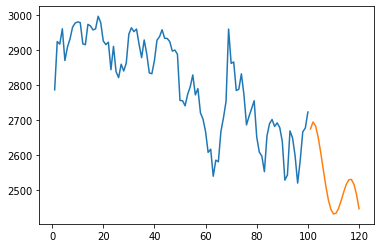

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1464:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

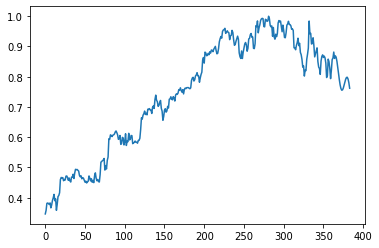

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()


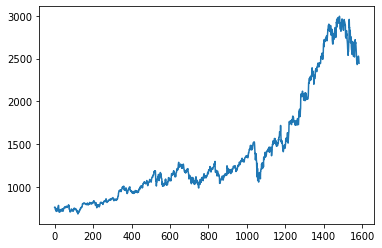

In [ ]:
plt.plot(df3)

In [ ]:
lst_output=scaler.inverse_transform(lst_output)

In [ ]:
lst_output

array([[2673.87677723],
       [2693.77200222],
       [2682.83000804],
       [2651.26872385],
       [2607.62676148],
       [2558.82524934],
       [2511.38587933],
       [2471.41268781],
       [2443.69284039],
       [2430.77616111],
       [2432.58328713],
       [2446.62650446],
       [2468.62753574],
       [2493.26782952],
       [2514.92270086],
       [2528.36552117],
       [2529.45410308],
       [2515.76836352],
       [2487.11148268],
       [2445.73142982]])